# THE SPARK FOUNDATION 

#### DATA SCIENCE & BUSSINESS ANALYTICS

NAME : SANJIT KUMAR KAR

EMAIL ID : sanjitkar661@gmail.com

LINKEDIN PROFILE : https://www.linkedin.com/in/sanjit-kumar-kar-a0a92515b

### PROJECT 2 : Prediction Using Unsupervised ML

PROBLEM STATEMENT : Form the given 'iris'dataset,predict the optimum number of clusters and represent it visually.

#### K-MEANS CLUSTERING

In [26]:
# Import all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [27]:
iris = pd.read_csv('Iris.csv')

In [28]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [32]:
iris.shape

(150, 6)

In [33]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### The optimum number of cluster for K-Means 


#### About Elbow Method 

Elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


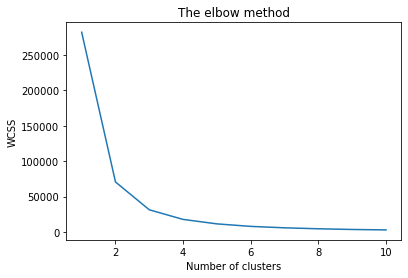

In [34]:
# find the optimum no of cluster for  k means classfication
x = iris.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++',max_iter =300 ,n_init =10,random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# creat a kmeans classifier
kmeans = KMeans(n_clusters = 3, init ='k-means++',max_iter=300,n_init=10,random_state = 0)
y_kmeans = kmeans.fit_predict(x)
               

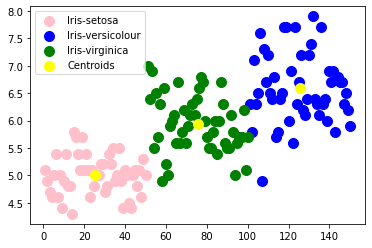

In [36]:
#visualizing cluster on two columns
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],
            s=100, c='pink',label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],
            s=100, c='blue',label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],
            s=100, c='green',label = 'Iris-virginica')

#ploting centriod 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=100, c='yellow',label='Centroids')
plt.legend()